We have several series of data here, and we need to do some cleanup. Let's
* Load up the data with two header rows
* Consolidate our header rows and rename to get one header row
* Parse our date column
* Remove the High, Low, and Open quotes as we won't be using them

In [1]:
import pandas as pd

DATA = '/kaggle/input/stock-market-data-fang/Stock_Market_Data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, header=[0, 1], )
df.columns = ['_'.join(col) for col in df.columns]
df = df.tail(n=len(df)-1)
df['date'] = pd.to_datetime(df['Price_Ticker'])
df = df.drop(columns=['Price_Ticker'])
drop_columns = [column for column in df.columns if column.startswith('High') or column.startswith('Low') or column.startswith('Open')]
df = df.drop(columns=drop_columns)
df.head()

,Close_AAPL,Close_AMZN,Close_DAX,Close_GOOG,Close_META,Close_NFLX,Close_TATAMOTORS.NS,Close_TSLA,Close_^NSEI,Volume_AAPL,Volume_AMZN,Volume_DAX,Volume_GOOG,Volume_META,Volume_NFLX,Volume_TATAMOTORS.NS,Volume_TSLA,Volume_^NSEI,date
1,6.447412,6.6950,NaN,15.554352,NaN,7.640000,152.195312,NaN,5232.200195,493729600.0,151998000.0,NaN,78541293.0,NaN,17239600.0,27906448.0,NaN,0.0,2010-01-04
2,6.458559,6.7345,NaN,15.485854,NaN,7.358571,149.543472,NaN,5277.899902,601904800.0,177038000.0,NaN,120638494.0,NaN,23753100.0,23669317.0,NaN,0.0,2010-01-05
3,6.355827,6.6125,NaN,15.095475,NaN,7.617143,149.773651,NaN,5281.799805,552160000.0,143576000.0,NaN,159744526.0,NaN,23290400.0,14990820.0,NaN,0.0,2010-01-06
4,6.344077,6.5000,NaN,14.744060,NaN,7.485714,144.654144,NaN,5263.100098,477131200.0,220604000.0,NaN,257533695.0,NaN,9955400.0,22722030.0,NaN,0.0,2010-01-07
5,6.386255,6.6760,NaN,14.940616,NaN,7.614286,145.446014,NaN,5244.750000,447610800.0,196610000.0,NaN,189680313.0,NaN,8180900.0,16495776.0,NaN,0.0,2010-01-08


Now let's look at our price and volume correlations. Very broadly we expect our prices to be positively correlated, even highly correlated, and we tend to expect the prices and volumes of each issue to be negatively correlated, but lightly to moderately. Because we have more than a few items (we have closing prices and volumes for nine issues), let's look at these correlations graphically instead of a big wall of numbers.

<Axes: >

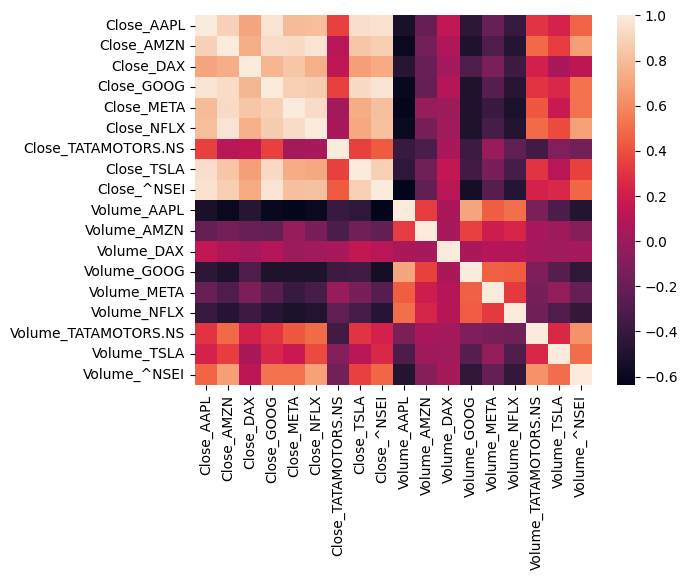

In [2]:
from seaborn import heatmap
heatmap(data=df.drop(columns=['date']).corr(numeric_only=True))

What do we see? We indeed see that prices are positively correlated: they tend to move together, even though they're spread across several countries. And we also see that the prices and volumes of each quote are indeed negatively correlated, but as a result sometimes we see positive correlations between pairs of volumes.

Let's plot our big time series. Because we want to use Seaborn and we want to plot multiple series, we need to select the price columns and melt the data to get the data in long form.

In [3]:
close_plot_df = df.drop(columns=[column for column in df.columns if column.startswith('Volume')]).melt(id_vars=['date'], value_vars=[column for column in df.columns if column.startswith('Close')])
close_plot_df.shape

(32625, 3)

Because our issues are quoted in different currencies they have quotes that are very different scales. Let's use a log plot to smooth out some of those differences.

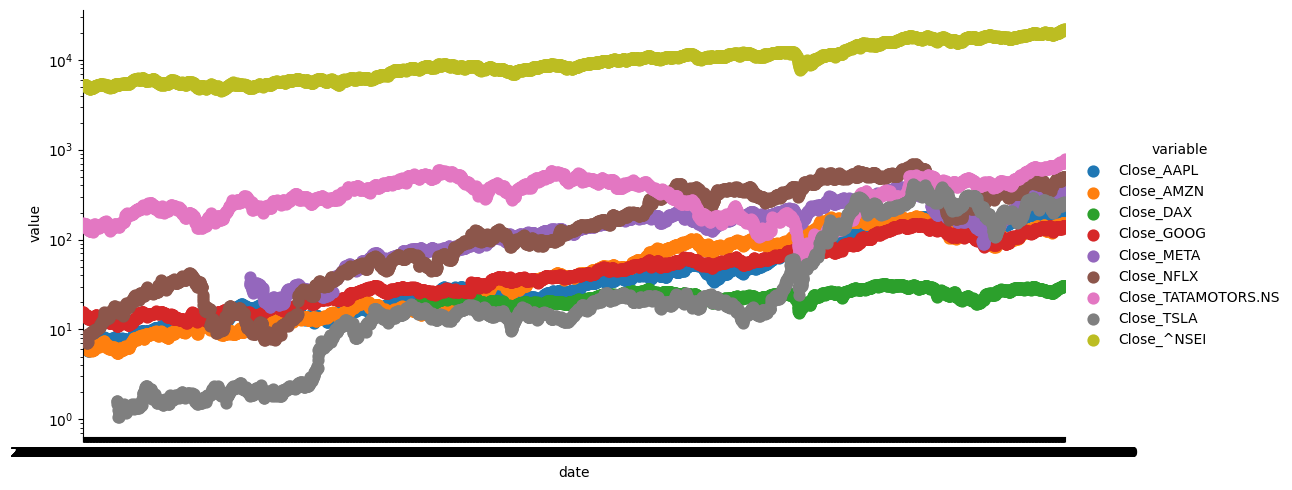

In [4]:
from seaborn import catplot

close_result = catplot(kind='point', aspect=2.2, data=close_plot_df, x='date', y='value', hue='variable',)
close_result.set(yscale='log')

That's kind of ugly but it may be the best we can do with a Seaborn catplot.

In [5]:
volume_plot_df = df.drop(columns=[column for column in df.columns if column.startswith('Close')]).melt(id_vars=['date'], value_vars=[column for column in df.columns if column.startswith('Volume')])
volume_plot_df.shape

(32625, 3)

Now let's try the same thing, but with the volumes. These are probably going to look chaotic, as volumes tend to look kind of random and vary a lot from day to day.

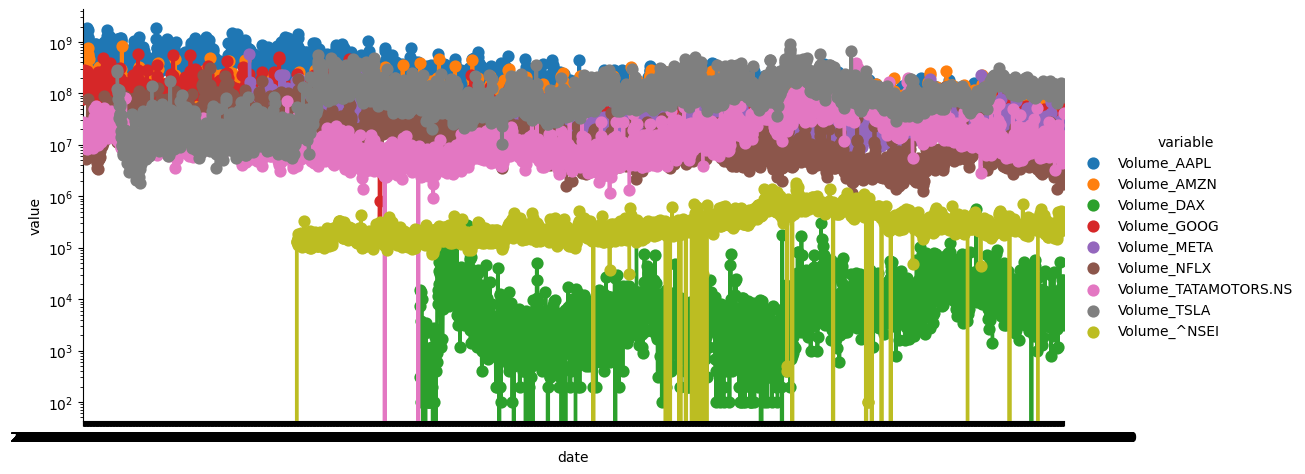

In [6]:
volume_result = catplot(kind='point', aspect=2.2, data=volume_plot_df, x='date', y='value', hue='variable',)
volume_result.set(yscale='log')